Original shape: (150, 2)
Reduced shape: (150, 2)


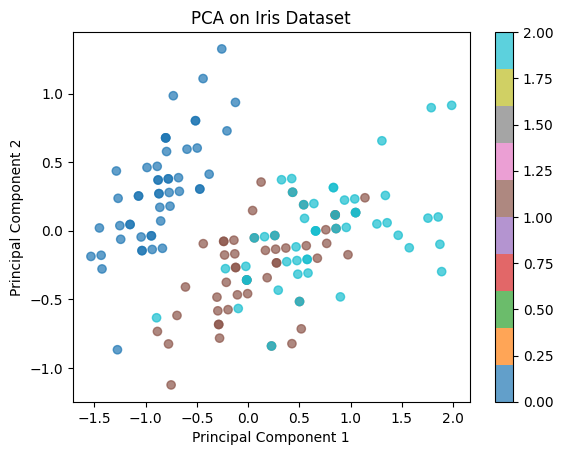

In [1]:
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Load iris dataset from sklearn
iris = load_iris()
X = iris.data[:, [0, 1]]   # selecting 2 features (you can change)
y = iris.target

# Apply PCA to reduce to 2 dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

print("Original shape:", X.shape)
print("Reduced shape:", X_pca.shape)

# Plot the 2D projection
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='tab10', alpha=0.7)
plt.title("PCA on Iris Dataset")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar()
plt.show()


Accuracy: 0.8


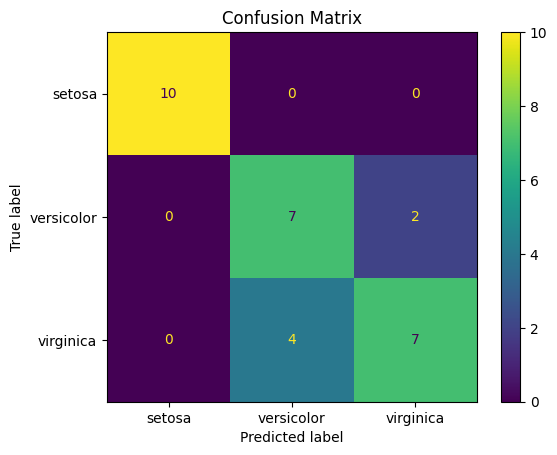

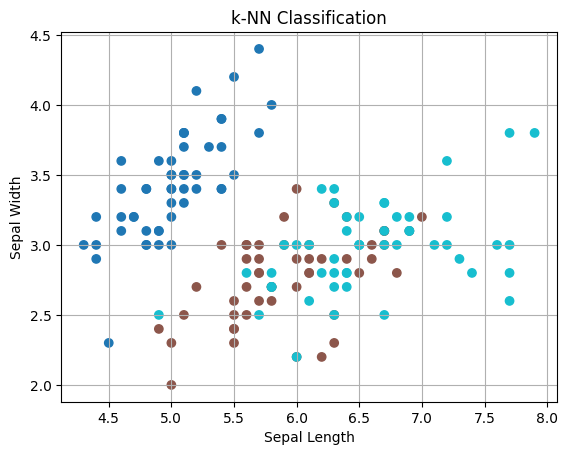

In [2]:
# k-NN with confusion matrix using sklearn iris dataset
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import pandas as pd

# Load iris dataset
iris = load_iris()
X = iris.data[:, [0, 1]]   # Sepal Length & Sepal Width
y = iris.target

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train k-NN classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Accuracy
print("Accuracy:", knn.score(X_test, y_test))

# Predict and compute confusion matrix
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names)
disp.plot()
plt.title("Confusion Matrix")
plt.show()

# Scatter plot
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='tab10')
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.title("k-NN Classification")
plt.grid(True)
plt.show()


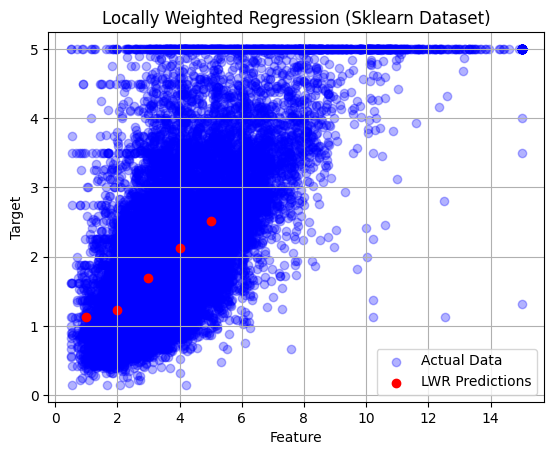

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing

# Locally Weighted Regression (LWR)
def lwr(X, Y, tau, x):
    w = np.exp(-((X - x)**2).sum(axis=1) / (2 * tau**2))
    Xb = np.c_[np.ones(len(X)), X]
    xb = np.array([1, x])   # FIXED
    W = np.diag(w)
    theta = np.linalg.pinv(Xb.T @ W @ Xb) @ Xb.T @ W @ Y
    return xb @ theta

# Load sklearn dataset
data = fetch_california_housing()
X = data.data[:, 0].reshape(-1, 1)   # single feature
y = data.target

# Query points
xq = np.array([1, 2, 3, 4, 5])
y_pred = [lwr(X, y, 0.5, p) for p in xq]   # FIXED

# Plot
plt.scatter(X, y, color='blue', label="Actual Data", alpha=0.3)
plt.scatter(xq, y_pred, color='red', label="LWR Predictions")
plt.title("Locally Weighted Regression (Sklearn Dataset)")
plt.xlabel("Feature")
plt.ylabel("Target")
plt.legend()
plt.grid(True)
plt.show()


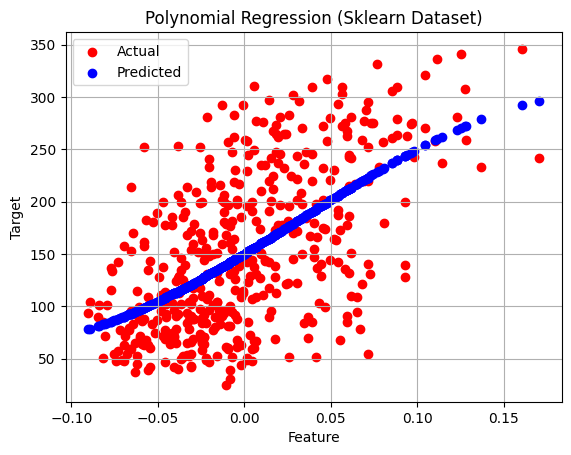

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Load sklearn dataset
data = load_diabetes()
X = data.data[:, 2].reshape(-1, 1)   # Single feature
y = data.target

# Polynomial features (degree 3)
polyreg = PolynomialFeatures(degree=3)
X_poly = polyreg.fit_transform(X)

# Train model
linreg = LinearRegression()
linreg.fit(X_poly, y)

# Predictions
pred = linreg.predict(X_poly)

# Plot
plt.scatter(X, y, color='red', label="Actual")
plt.scatter(X, pred, color='blue', label="Predicted")
plt.title('Polynomial Regression (Sklearn Dataset)')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()
plt.grid()
plt.show()


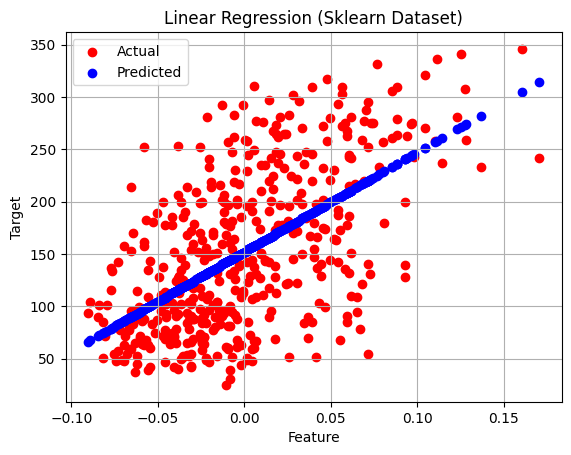

Slope: 949.4353
Intercept: 152.1335
MAE: 51.7986


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# Load sklearn dataset
data = load_diabetes()
X = data.data[:, 2].reshape(-1, 1)   # Single feature
y = data.target

# Train model
model = LinearRegression()
model.fit(X, y)

# Predictions
predictions = model.predict(X)

# Plot
plt.scatter(X, y, color='red', label="Actual")
plt.scatter(X, predictions, color='blue', label="Predicted")
plt.title('Linear Regression (Sklearn Dataset)')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()
plt.grid()
plt.show()

# Results
print(f"Slope: {model.coef_[0]:.4f}")
print(f"Intercept: {model.intercept_:.4f}")
print(f"MAE: {mean_absolute_error(y, predictions):.4f}")


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float

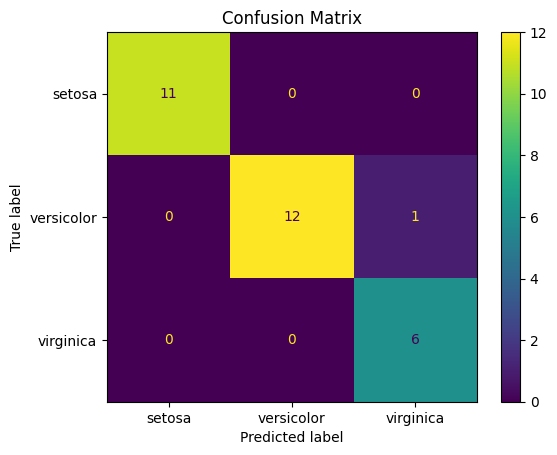

Predicted labels: [0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1, 2, 0, 2, 1, 0, 0, 1, 2]
Accuracy: 96.67%


In [9]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import pandas as pd

# Load sklearn iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Optional: convert to DataFrame for viewing
df = pd.DataFrame(X, columns=iris.feature_names)
df['target'] = y
print(df.head())
print(df.info())

# Split data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1
)

# Train model (ID3 uses entropy)
model = DecisionTreeClassifier(criterion="entropy")
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names)
disp.plot()
plt.title("Confusion Matrix")
plt.show()

# Accuracy
acc = accuracy_score(y_test, y_pred) * 100
print("Predicted labels:", y_pred.tolist())
print(f"Accuracy: {acc:.2f}%")


Test accuracy: 0.9415204678362573


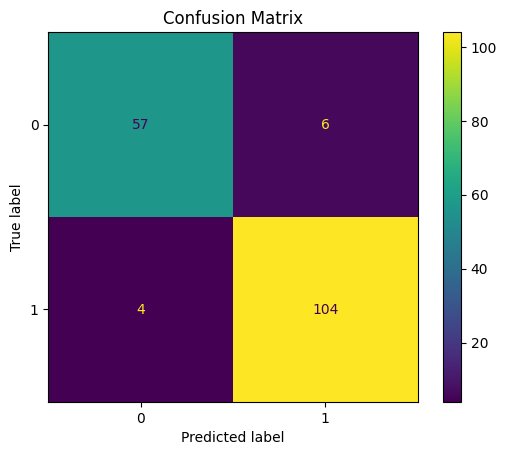

In [10]:
#naive_bayes
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train naive_bayes classifier
model = GaussianNB()
model.fit(X_train, y_train)

# Test accuracy
accuracy = model.score(X_test, y_test)
print("Test accuracy:", accuracy)
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.title("Confusion Matrix")
plt.show()

Accuracy: 0.9
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.88      0.78      0.82         9
           2       0.83      0.91      0.87        11

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30



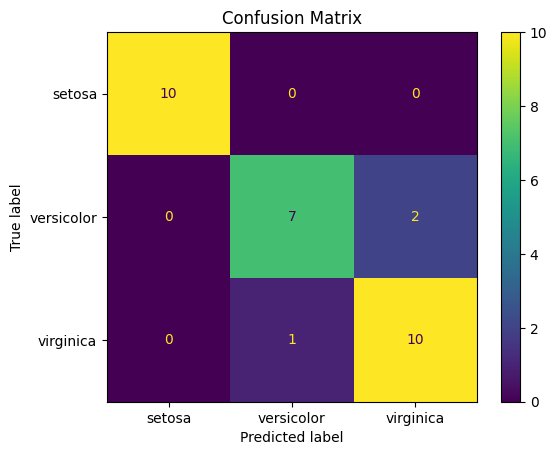

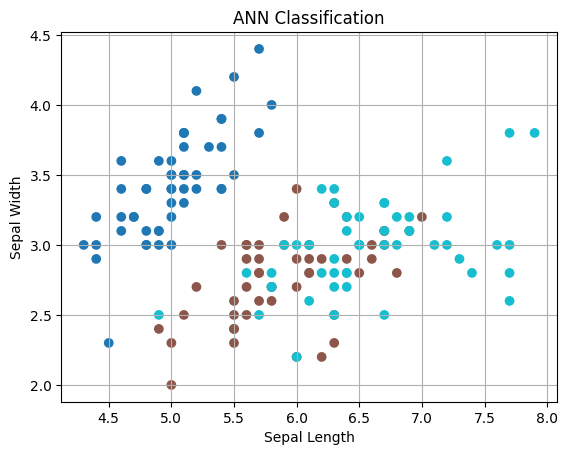

In [12]:
# ANN using sklearn Iris dataset
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Load dataset
iris = load_iris()
X = iris.data[:, [0, 1]]   # Sepal length & width
y = iris.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train ANN
model = MLPClassifier(max_iter=1000, random_state=1)
model.fit(X_train, y_train)

# Evaluate
print("Accuracy:", model.score(X_test, y_test))
print(classification_report(y_test, model.predict(X_test)))

# Confusion matrix
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names)
disp.plot()
plt.title("Confusion Matrix")
plt.show()

# Scatter plot
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='tab10')
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.title("ANN Classification")
plt.grid(True)
plt.show()
